# Kruskal's Algorithms


## What is a minimum spanning tree?

## Criterion for a tree to be a minimum spanning tree

## Applications of Minimum Spanning Tree


## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Bellmann-Ford's algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

<a class="anchor" id="graph1"></a>
## Building the graph

To establish the implementation of the Bellmann-Ford's algorithm, we create a weighted, undirected graph which is the same graph used in the previous notebooks.

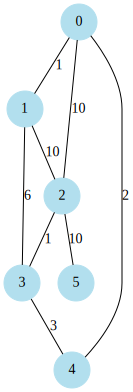

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "kruskal")

<a class="anchor" id="algorithm"></a>
## About the algorithm

### Psuedo code
<pre><b>algorithm</b> Kruskal(<i>G</i>) <b>is</b>
    A&nbsp;:= ∅

</pre>

<a class="anchor" id="implementation"></a>
## Implementing Kruskal's algorithm

In [3]:
#Function to find set(list implementation) of a node
def find(parent, nodeIndex):
    if parent[nodeIndex] == nodeIndex:
        return nodeIndex
    return find(parent, parent[nodeIndex])

#Function implementing union by rank for two sets x, y
def union(parent, rank, x, y):
    xRoot = find(parent, x)
    yRoot = find(parent, y)
    
    #Attach smaller rank under the root of a higher rank
    if rank[xRoot] < rank[yRoot]:
        parent[xRoot] = yRoot
    elif rank[xRoot] > rank[yRoot]:
        parent[yRoot] = xRoot
    #If ranks are same, pick one root and increment its rank by 1
    else:
        parent[yRoot] = xRoot #you could also make `xRoot` as root
        rank[yRoot] += 1
        
#Function implementing the Kruskal's algorithm
def kruskal(graph):
    mst = [] #stores the edges of the minimum spanning tree (MST)
    sortedListIndex = 0
    mstIndex = 0
    
    #sort the list of edges in the graph in ascending order
    edges = graph.get_allEdges()
    edges = sorted(edges, key=lambda item: item[2])
    
    parent = []
    rank = []
    
    #create a forest(group of trees) where each node is a tree
    for node in graph.get_allNodes():
        parent.append(node.index)
        rank.append(0)

    #number edges to be taken is |V| - 1
    while mstIndex < len(graph.get_allNodes()) - 1:
        #pick the edge with smallest weight and increment list index
        u, v, w = edges[sortedListIndex]
        sortedListIndex += 1
        
        x = find(parent, u)
        y = find(parent, v)
        
        #Add the edge to MST if it doesn't cause a cycle and increment mstIndex 
        if x != y:
            mstIndex += 1
            mst.append([u, v, w])
            union(parent, rank, x, y)
        #Else discard edge

    return mst

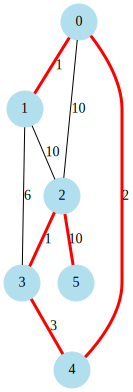

In [4]:
mst = kruskal(graphs)
displayPath(mst, "kruskal")

<a class="anchor" id="proof"></a>
## Proof of correctness

<a class="anchor" id="runningTime"></a>
## Time Complexity

https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

https://en.wikipedia.org/wiki/Kruskal%27s_algorithm